C:\Users\C\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\C\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


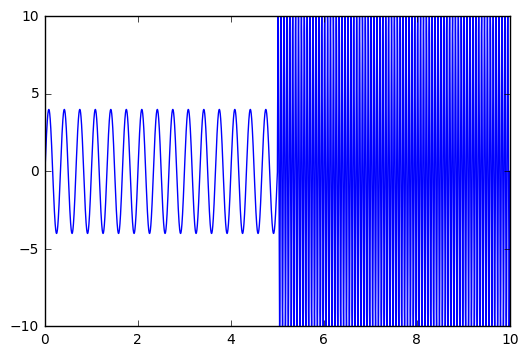

In [2]:
import matplotlib.pyplot as plot
import numpy as np

sr = 1000 #This represents the sample rate
sec_col = 10 #this is the number of seconds collected
#So, the total number of samples we collect is 1000 samples/second * 10 seconds
bsize = sr * sec_col

first_wave = 3 # This represents the frequency
x = np.linspace(0,sec_col,bsize)

y = 4*np.sin(2*np.pi*first_wave*x)
second_wave = 16
y[bsize/2:] = np.zeros(bsize/2) #we're going to zero out half of the y we just computed
y[bsize/2:] = 10 * np.sin(2 * np.pi * second_wave * x[bsize/2:])

% matplotlib inline
plot.plot(x,y)

[0, 30, 0, 10]

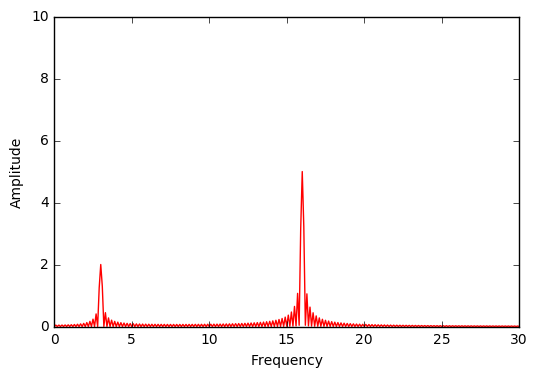

In [3]:

fft_output = np.fft.rfft(y)
Amplitude = [*(np.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output)]
Fq = [(i*1.0/bsize)*sr for i in range(bsize//2+1)] 
plot.xlabel('Frequency')
plot.ylabel('Amplitude')
plot.plot(Fq, Amplitude, 'r')

plot.axis([0,30,0,10])

#Only recovers half of the amplitude. Needs Revision.

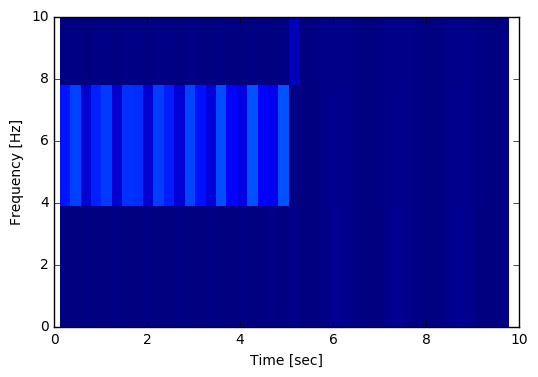

In [4]:

from scipy import signal

f, t, Sxx = signal.spectrogram(y,sr)
plot.pcolormesh(t, f, Sxx)
plot.ylabel('Frequency [Hz]')
plot.xlabel('Time [sec]')
plot.axis([0,10,0,10])
plot.show()
